# Importando Bibliotecas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas==1.5.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 50.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import auth
import gspread
from google.auth import default
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,accuracy_score,f1_score
from scipy.spatial.distance import cdist
import math
from pickle import load
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

# Iniciando dataset

In [ ]:
# GDrive authentication
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
# Defining worksheet
worksheet = gc.open('Saúde Mental em Estudantes da Graduação de Medicina (respostas)').sheet1
# Get_all_values gives a list of rows
rows = worksheet.get_all_values()
# Convert to a DataFrame 
df = pd.DataFrame(rows)
# Editing columns name
df.columns = df.iloc[0]
df = df.iloc[1:]
df = df.tail(-1)

In [ ]:
df.shape # rows = 15, col = 33

(121, 33)

In [ ]:
df.dtypes 

0
Carimbo de data/hora                                                                                                                          object
Email                                                                                                                                         object
Você concorda em participar dessa pesquisa, considerando as informações explicadas anteriormente?                                             object
Idade (Apenas números)                                                                                                                        object
Gênero                                                                                                                                        object
Estado Civil                                                                                                                                  object
Data de nascimento                                                                                      

In [ ]:
df.columns

Index(['Carimbo de data/hora', 'Email',
       'Você concorda em participar dessa pesquisa, considerando as informações explicadas anteriormente?',
       'Idade (Apenas números)', 'Gênero', 'Estado Civil',
       'Data de nascimento', 'Universidade (Apenas a sigla)', 'Curso',
       'Período da Graduação (Escreva apenas o número)', 'Ocupação', 'Filhos',
       'Achei dificil me acalmar', 'Senti minha boca seca',
       'Não consegui vivenciar nenhum sentimento positivo',
       'Tive dificuldade em respirar em alguns momentos (ex. respiração ofegante, falta de ar, sem ter feito nenhum esforço físico)',
       'Achei difícil ter iniciativa para fazer as coisas',
       'Tive a tendência de reagir de forma exagerada às situações',
       'Senti tremores (ex. nas mãos)', 'Senti que estava sempre nervoso',
       'Preocupei-me com situações em que eu pudesse entrar em pânico e parecesse ridículo (a) ',
       'Senti que não tinha nada a desejar', 'Senti-me agitado',
       'Achei difícil 

In [ ]:
#Renomeando colunas para facil entendimento e acesso
df.columns = ['Stamp', 'Email', 'Terms', 'Age', 'Gender', 'Marital_Status', 'Dob', 'University', 'Course', 'Grad_Period', 'Ocupation', 'Children', 'S1', 'A2', 'D3', 'A4', 'D5', 'S6', 'A7', 'S8', 'A9', 'D10', 'S11', 'S12', 'D13', 'S14', 'A15', 'D16', 'D17', 'S18', 'A19', 'A20', 'D21']
df.columns

Index(['Stamp', 'Email', 'Terms', 'Age', 'Gender', 'Marital_Status', 'Dob',
       'University', 'Course', 'Grad_Period', 'Ocupation', 'Children', 'S1',
       'A2', 'D3', 'A4', 'D5', 'S6', 'A7', 'S8', 'A9', 'D10', 'S11', 'S12',
       'D13', 'S14', 'A15', 'D16', 'D17', 'S18', 'A19', 'A20', 'D21'],
      dtype='object')

# Corrigindo Respostas Duplicadas

In [ ]:
#Corrigindo respostas duplicadas da coluna University
df['University']
university_rename = {'Up': 'UP', 
                     'Positivo': 'UP', 
                     'positivo': 'UP',
                     'Universidade Positivo': 'UP',
                     'Universidade positivo': 'UP',
                     'Universidade Positivo ': 'UP',
                     'Universidade positivo ': 'UP',
                     'unisul pb': 'UNISUL',
                     'UNISUL PB': 'UNISUL',
                     'Unisul': 'UNISUL',
                     'Unicesumar': 'UNICESUMAR',
                     'Unisul - Pedra Branca ': 'UNISUL',
                     'UNISUL PEDRA BRANCA ': 'UNISUL',
                     'Universidade do Sul de Santa Catarina': 'UNISUL',
                     'Unisul Pedra Branca': 'UNISUL',
                     'Unisul- Tubarão': 'UNISUL',
                     'Unisul TB': 'UNISUL',
                     'Unisul': 'UNISUL',
                     'unisul pedra branca ': 'UNISUL',
                     'Univali Itajaí': 'UNIVALI',
                     'Univali': 'UNIVALI',
                     'UNIVALI SC': 'UNIVALI',
                     'Universidade Tuiuti do Paraná (UTP)': 'UTP',
                     'Unisul PB': 'UNISUL',
                     'Unisul Tubarão ': 'UNISUL',
                     'PUCPR ': 'PUCPR',
                     'pucpr': 'PUCPR',
                     'Fpp': 'FPP',
                     'Fempar ': 'FEMPAR',
                     'Unoeste': 'UNOESTE',
                     'Federal do Paraná': 'UFPR',
                     'Ufpr': 'UFPR',
                     'pucpr': 'PUCPR',
                     'Pucpr': 'PUCPR',
                     }
df['University'].replace(university_rename,inplace=True)
df['University']

2        UP
3        UP
4        UP
5        UP
6        UP
       ... 
118      UP
119      UP
120      UP
121    UFPR
122     FPS
Name: University, Length: 121, dtype: object

In [ ]:
#Corrigindo respostas duplicadas da coluna Children e Age
df['Children']
children_rename = {'Não': '0', 
                   'Não ': '0',
                   'Nao': '0', 
                   'Nenhum': '0',
                   'Sim': '1'
                   }
df['Children'].replace(children_rename,inplace=True)
df['Age']
age_rename = {'22 anos': '22'}
df['Age'].replace(age_rename,inplace=True)
#Atribuindo coluna Age como int
df['Age'] = df['Age'].astype(int)


In [ ]:
#pd.set_option('display.max_rows', None)
#Corrigindo respostas duplicadas da coluna Children e Age
df['Grad_Period']
period_rename = {'9°': '9',
                 '9º período ': '9',
                 '1 fase ': '1',
                 '1 fase': '1',
                 '1 semestre ': '1',
                 '1º': '1',
                 '1º semestre': '1',
                 '1° fase': '1',
                 '5° semestre': '5',
                 'Primeiro período ': '1',
                 '5 fase': '5',
                 '2023- 2028': '1',
                 '1°': '1',
                 '5º período.': '5',
                 'quarto período': '4',
                 '4° período': '4',
                 'quarto ': '4',
                 'Quarto': '4',
                 '4º P': '4',
                 '4°': '4',
                 '1 periodo': '1',
                 '7° Período ': '7',
                 '6 período ': '6',
                 'Segundo ': '2',
                 '2º período ': '2',
                 'Segundo periodo': '2',
                 '2020 - 2024': '7',
                 '6° período ': '6',
                 '5°': '5',
                 '5º': '5',
                 'Terceiro ': '3',
                 '3o semestre': '3',
                 '3 período ': '3',
                 '3°': 3
                 }
df['Grad_Period'].replace(period_rename,inplace=True)
df['Grad_Period']
#Atribuindo coluna Grad_Period como int
df['Grad_Period'] = df['Grad_Period'].astype(int)

In [ ]:
df['Ocupation']
ocupation_rename = {'Estudante ': 'Estudante',
                 'estudante ': 'Estudante',
                 'estudante': 'Estudante',
                 'Estudante de Medicina ': 'Estudante',
                 'Estudante, auxiliar administrativa e monitora em festas infantis': 'Estudante e Trabalho',
                 'Geólogo': 'Estudante e Trabalho',
                 'Nenhuma': 'Estudante e Trabalho',
                 'Estudante / servidora pública ': 'Estudante e Trabalho',
                 'Estudante universitário ': 'Estudante e Trabalho',
                 'Professor': 'Estudante e Trabalho',
                 'Professora de biologia a noite ': 'Estudante e Trabalho'
                 }
df['Ocupation'].replace(ocupation_rename,inplace=True)
df['Ocupation']

2      Estudante e Trabalho
3                 Estudante
4                 Estudante
5                 Estudante
6                 Estudante
               ...         
118               Estudante
119               Estudante
120               Estudante
121               Estudante
122               Estudante
Name: Ocupation, Length: 121, dtype: object

In [ ]:
#Atribuindo valores do DASS 21 para as respostas
dass_rename = {'Nunca': 0,
               '0': 0,
               'Algumas vezes': 1,
               '1': 1,
               'Frequentemente': 2, 
               '2': 2,
               'Quase sempre': 3,
               '3': 3
               }
#'S1','A2', 'D3', 'A4', 'D5', 'S6', 'A7', 'S8', 'A9', 'D10', 'S11', 'S12', 'D13'
#'S14', 'A1', 'D16', 'D17', 'S18', 'A19', 'A20', 'D21'
df['S1'].replace(dass_rename,inplace=True)
df['A2'].replace(dass_rename,inplace=True)
df['D3'].replace(dass_rename,inplace=True)
df['A4'].replace(dass_rename,inplace=True)
df['D5'].replace(dass_rename,inplace=True)
df['S6'].replace(dass_rename,inplace=True)
df['A7'].replace(dass_rename,inplace=True)
df['S8'].replace(dass_rename,inplace=True)
df['A9'].replace(dass_rename,inplace=True)
df['D10'].replace(dass_rename,inplace=True)
df['S11'].replace(dass_rename,inplace=True)
df['S12'].replace(dass_rename,inplace=True)
df['D13'].replace(dass_rename,inplace=True)
df['S14'].replace(dass_rename,inplace=True)
df['A15'].replace(dass_rename,inplace=True)
df['D16'].replace(dass_rename,inplace=True)
df['D17'].replace(dass_rename,inplace=True)
df['S18'].replace(dass_rename,inplace=True)
df['A19'].replace(dass_rename,inplace=True)
df['A20'].replace(dass_rename,inplace=True)
df['D21'].replace(dass_rename,inplace=True)


In [ ]:
df['Course']
course_rename = {'Medicina ': 'Medicina'
                 }
df['Course'].replace(course_rename,inplace=True)
df = df.drop(df[df.Course != 'Medicina'].index)
df['Course']


2      Medicina
3      Medicina
4      Medicina
5      Medicina
6      Medicina
         ...   
118    Medicina
119    Medicina
120    Medicina
121    Medicina
122    Medicina
Name: Course, Length: 119, dtype: object

# Soma dos valores das colunas DASS-21



In [ ]:
# Sum of 12 to 32
from pandas._libs.lib import to_object_array_tuples
dep_sum = df['D3'] + df['D5'] + df['D10'] + df['D13'] + df['D16'] + df['D17'] + df['D21']
anx_sum = df['A2'] + df['A4'] + df['A7'] + df['A9'] + df['A15'] + df['A19'] + df['A20']
str_sum = df['S1'] + df['S6'] + df['S8'] + df['S11'] + df['S12'] + df['S14'] + df['S18']
df['Depression_Score'] = dep_sum
df['Anxiety_Score'] = anx_sum
df['Stress_Score'] = str_sum


# Classificando Scores

In [ ]:
#DASS-21  Scoring	Depression	Anxiety	Stress
#         Normal	    0-4	      0-3 	 0-7
#         Mild        5-6	      4-5	   8-9
#         Moderate    7-10	    6-7	   10-12
#         Severe      11-13	    8-9	   13-16
#Extremely Severe	    14+	      10+	   17+

def classify_depscore(score):
  if score >= 0 and score <= 4:
    return 'Normal'
  elif score >= 5 and score <= 6:
    return 'Mild'
  elif score >= 7 and score <= 10:
    return 'Moderate'
  elif score >= 11 and score <= 13:
    return 'Severe'
  else:
    return 'Extremely Severe'

def classify_anxscore(score):
  if score >= 0 and score <= 3:
    return 'Normal'
  elif score >= 4 and score <= 5:
    return 'Mild'
  elif score >= 6 and score <= 7:
    return 'Moderate'
  elif score >= 8 and score <= 9:
    return 'Severe'
  else:
    return 'Extremely Severe'

def classify_strscore(score):
  if score >= 0 and score <= 7:
    return 'Normal'
  elif score >= 8 and score <= 9:
    return 'Mild'
  elif score >= 10 and score <= 12:
    return 'Moderate'
  elif score >= 13 and score <= 16:
    return 'Severe'
  else:
    return 'Extremely Severe'

df['Classify_Dep'] = df['Depression_Score'].apply(classify_depscore)
df['Classify_Anx'] = df['Anxiety_Score'].apply(classify_anxscore)
df['Classify_Str'] = df['Stress_Score'].apply(classify_strscore)
df.columns

Index(['Stamp', 'Email', 'Terms', 'Age', 'Gender', 'Marital_Status', 'Dob',
       'University', 'Course', 'Grad_Period', 'Ocupation', 'Children', 'S1',
       'A2', 'D3', 'A4', 'D5', 'S6', 'A7', 'S8', 'A9', 'D10', 'S11', 'S12',
       'D13', 'S14', 'A15', 'D16', 'D17', 'S18', 'A19', 'A20', 'D21',
       'Depression_Score', 'Anxiety_Score', 'Stress_Score', 'Classify_Dep',
       'Classify_Anx', 'Classify_Str'],
      dtype='object')

# Gráficos para análise

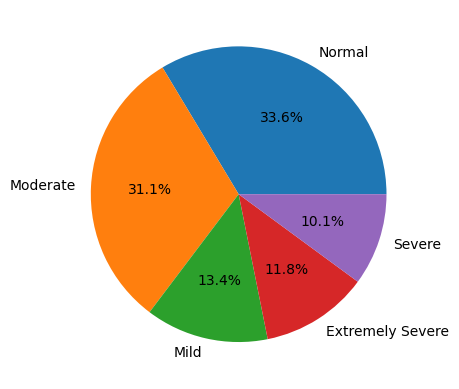

In [ ]:
valuesStr = df['Classify_Str'].value_counts()
valuesDep = df['Classify_Dep'].value_counts()
valuesAnx = df['Classify_Anx'].value_counts()

#Porcentagem de Scores de Depressão
plt.pie(valuesDep, labels=valuesDep.index, autopct='%1.1f%%')
plt.show()

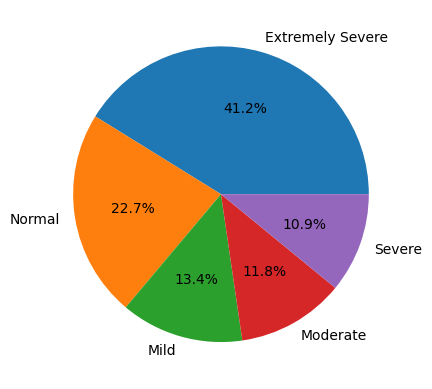

In [ ]:
#Porcentagem de Scores de Ansiedade
plt.pie(valuesAnx, labels=valuesAnx.index, autopct='%1.1f%%')
plt.show()

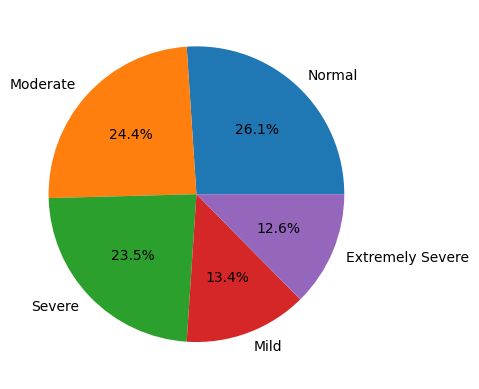

In [ ]:
#Porcentagem de Scores de Estresse
plt.pie(valuesStr, labels=valuesStr.index, autopct='%1.1f%%')
plt.show()

# Normalização

In [ ]:
#Mantidas
columns_to_keep=['Gender', 'Marital_Status','University','Ocupation','Children','Classify_Dep', 'Classify_Anx', 'Classify_Str']
#numéricas
num_columns = ['Age', 'Grad_Period']

In [ ]:
#excluir colunas selecionadas
dados = df
dados_num = dados[num_columns]
dados_cat = dados.drop(columns = num_columns)
dados = dados[columns_to_keep]

dados_cat

,Stamp,Email,Terms,Gender,Marital_Status,Dob,University,Course,Ocupation,Children,...,S18,A19,A20,D21,Depression_Score,Anxiety_Score,Stress_Score,Classify_Dep,Classify_Anx,Classify_Str
2,27/02/2023 16:35:25,fabiocrisigiovanni@gmail.com,Sim,Masculino,Solteira(o),27/06/1988,UP,Medicina,Estudante e Trabalho,0,...,1,2,2,0,4,10,9,Normal,Extremely Severe,Mild
3,27/02/2023 16:36:18,Guilhermecbarros16@gmail.com,Sim,Masculino,Solteira(o),18/06/1999,UP,Medicina,Estudante,0,...,1,0,0,1,7,1,9,Moderate,Normal,Mild
4,27/02/2023 17:05:17,marianacosmo01@gmail.com,Sim,Feminino,Solteira(o),09/06/1997,UP,Medicina,Estudante,0,...,0,1,1,0,8,4,4,Moderate,Mild,Normal
5,27/02/2023 17:10:07,nicollegabriela_@hotmail.com,Sim,Feminino,Solteira(o),16/10/1998,UP,Medicina,Estudante,0,...,2,0,1,0,3,5,7,Normal,Mild,Normal
6,27/02/2023 17:32:43,alessimateus@gmail.com,Sim,Masculino,Solteira(o),23/02/2001,UP,Medicina,Estudante,0,...,1,1,1,1,7,7,7,Moderate,Moderate,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,14/03/2023 10:47:45,giovanafcunha@gmail.com,Sim,Feminino,Solteira(o),,UP,Medicina,Estudante,0,...,0,0,1,0,1,1,2,Normal,Normal,Normal
119,14/03/2023 17:40:59,Valentinamartinsm@gmail.com,Sim,Feminino,Solteira(o),,UP,Medicina,Estudante,0,...,3,1,1,0,7,10,10,Moderate,Extremely Severe,Moderate
120,14/03/2023 20:16:55,erikah194@gmail.com,Sim,Feminino,Casada(o),,UP,Medicina,Estudante,1,...,2,3,1,1,9,11,12,Moderate,Extremely Severe,Moderate
121,18/03/2023 17:28:29,brunareginadealmeida1993@gmail.com,Sim,Feminino,Solteira(o),,UFPR,Medicina,Estudante,0,...,3,1,2,0,9,10,12,Moderate,Extremely Severe,Moderate


In [ ]:
colunas_cat = df[['Gender', 'Marital_Status','University','Ocupation','Children','Classify_Dep', 'Classify_Anx', 'Classify_Str']]
colunas_num = df[['Age', 'Grad_Period']]
#normalizar age e grad period com min max scaler e juntar com o join
colunas_cat_dummies = pd.get_dummies(colunas_cat, prefix_sep = '&')
colunas_cat_dummies

,Gender&Feminino,Gender&Masculino,Gender&Outro,Marital_Status&Casada(o),Marital_Status&Solteira(o),University&FEMPAR,University&FPP,University&FPS,University&Federal do Paraná,University&PUCPR,...,Classify_Anx&Extremely Severe,Classify_Anx&Mild,Classify_Anx&Moderate,Classify_Anx&Normal,Classify_Anx&Severe,Classify_Str&Extremely Severe,Classify_Str&Mild,Classify_Str&Moderate,Classify_Str&Normal,Classify_Str&Severe
2,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
6,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
119,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
120,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
121,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
#Normalização
normalizador = preprocessing.MinMaxScaler()
numerico = normalizador.fit(colunas_num)
from pickle import dump, load
#Salva o modelo normalizador
dump(numerico,open('num_normalizer.model', 'wb'))

In [ ]:
#Normaliza os atributos numéricos
num_normalize = numerico.fit_transform(colunas_num)
#Normaliza os dados categóricos com get_dummies
colunas_cat_norm = pd.get_dummies(colunas_cat_dummies,prefix_sep='&')
print(colunas_cat_norm.columns.to_list())

['Gender&Feminino', 'Gender&Masculino', 'Gender&Outro', 'Marital_Status&Casada(o)', 'Marital_Status&Solteira(o)', 'University&FEMPAR', 'University&FPP', 'University&FPS', 'University&Federal do Paraná ', 'University&PUCPR', 'University&UFPR', 'University&UFPR ', 'University&UNICESUMAR', 'University&UNISUL', 'University&UNIVALI', 'University&UNOESTE', 'University&UP', 'University&Unicesumar ', 'University&ufpr', 'Ocupation&Estudante', 'Ocupation&Estudante e Trabalho', 'Children&0', 'Children&1', 'Classify_Dep&Extremely Severe', 'Classify_Dep&Mild', 'Classify_Dep&Moderate', 'Classify_Dep&Normal', 'Classify_Dep&Severe', 'Classify_Anx&Extremely Severe', 'Classify_Anx&Mild', 'Classify_Anx&Moderate', 'Classify_Anx&Normal', 'Classify_Anx&Severe', 'Classify_Str&Extremely Severe', 'Classify_Str&Mild', 'Classify_Str&Moderate', 'Classify_Str&Normal', 'Classify_Str&Severe']


In [ ]:
#Salva estrutura de categóricos normalizados
f = open('cat_normal_definition.model', 'w')
f.write(','.join(str(s) for s in colunas_cat_norm.columns.values.tolist()))
f.close()

In [ ]:
#Recompõe o arquivo com os dados normalizados
num_normalize = pd.DataFrame(num_normalize, columns=colunas_num.columns)
dados_norm = colunas_cat_norm.join(num_normalize, how = 'left')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
dados_norm['Age'] =  dados_norm['Age'].fillna(0)
dados_norm['Grad_Period'] =  dados_norm['Grad_Period'].fillna(0)

# Método do Cotovelo

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

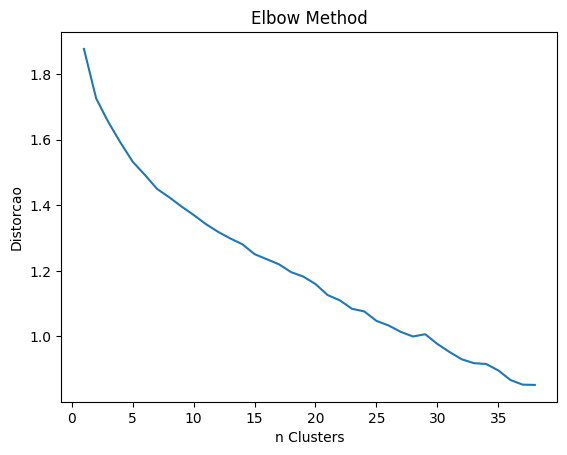

In [ ]:
distorcoes = []
K = range(1,39)
for k in K:
  kmeans_model = KMeans(n_clusters=k, random_state=42).fit(dados_norm)
  distorcoes.append(
      sum(np.min(
          cdist(dados_norm,kmeans_model.cluster_centers_,'euclidean'), axis =1
      )/dados.shape[0])
  )

fig, ax = plt.subplots()
ax.plot(K, distorcoes)
ax.set(xlabel = 'n Clusters', ylabel = 'Distorcao', title = 'Elbow Method')
fig.savefig('alunos_distorcao_.png')
plt.show()


In [ ]:
#Calcular o número ideal de clusters
x0 = K[0]
y0 = distorcoes[0]

x1 = K[len(K)-1]
y1 = distorcoes[len(distorcoes)-1]

distancias = []
for i in range(len(distorcoes)):
  x = K[i]
  y = distorcoes[i]
  numerador = abs((y1-y0)*x - (x1-x0)*y + x1*y0 - y1*x0)
  denominador = math.sqrt((y1-y0)**2 + (x1-x0)**2)
  distancias.append(numerador/denominador)

#maior distância
n_clusters_otimo =K[distancias.index(np.max(distancias))]
print('Numero ideal de clusters:',K[distancias.index(np.max(distancias))])


Numero ideal de clusters: 7


# Obtendo centroides

In [ ]:
#Treinar e obter centroides
dados_kmeans_model = KMeans(n_clusters=n_clusters_otimo).fit(dados_norm)
print('Centroides obtidos:')
print(dados_kmeans_model.cluster_centers_)

from pickle import  dump
dump(dados_kmeans_model,open('dados_kmeans_model.pkl','wb'))

Centroides obtidos:
[[-2.22044605e-16  1.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -6.93889390e-18  2.10526316e-01  0.00000000e+00
   0.00000000e+00  5.55111512e-17  5.26315789e-02  5.26315789e-02
   6.84210526e-01  0.00000000e+00  0.00000000e+00  7.89473684e-01
   2.10526316e-01  9.47368421e-01  5.26315789e-02  1.57894737e-01
   2.10526316e-01  2.63157895e-01  3.68421053e-01 -2.77555756e-17
   5.26315789e-02  1.57894737e-01  5.26315789e-02  5.78947368e-01
   1.57894737e-01  0.00000000e+00  1.57894737e-01  1.57894737e-01
   5.78947368e-01  1.05263158e-01  2.24171540e-01  4.94736842e-01]
 [ 1.00000000e+00 -8.32667268e-17  1.73472348e-18  1.42857143e-01
   8.57142857e-01  1.73472348e-18  4.76190476e-02  1.73472348e-18
   1.73472348e-18 -1.04083409e-17  4.76190476e-02  4.76190476e-02
   1.73472348e-18  9.52380952e-02  9.52380952e-02  1.73472348e-18
   6.66666667e-01  3.46944695e-18  1.73472348e-18  1.00

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Analisando clusters 

In [ ]:
cluster_data=pd.DataFrame(dados_kmeans_model.cluster_centers_, columns=dados_norm.columns)
cluster_data

,Gender&Feminino,Gender&Masculino,Gender&Outro,Marital_Status&Casada(o),Marital_Status&Solteira(o),University&FEMPAR,University&FPP,University&FPS,University&Federal do Paraná,University&PUCPR,University&UFPR,University&UFPR,University&UNICESUMAR,University&UNISUL,University&UNIVALI,University&UNOESTE,University&UP,University&Unicesumar,University&ufpr,Ocupation&Estudante,Ocupation&Estudante e Trabalho,Children&0,Children&1,Classify_Dep&Extremely Severe,Classify_Dep&Mild,Classify_Dep&Moderate,Classify_Dep&Normal,Classify_Dep&Severe,Classify_Anx&Extremely Severe,Classify_Anx&Mild,Classify_Anx&Moderate,Classify_Anx&Normal,Classify_Anx&Severe,Classify_Str&Extremely Severe,Classify_Str&Mild,Classify_Str&Moderate,Classify_Str&Normal,Classify_Str&Severe,Age,Grad_Period
0,-2.220446e-16,1.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.938894e-18,0.210526,0.000000e+00,0.000000e+00,5.551115e-17,5.263158e-02,5.263158e-02,0.684211,0.000000e+00,0.000000e+00,0.789474,2.105263e-01,0.947368,5.263158e-02,0.157895,0.210526,0.263158,0.368421,-2.775558e-17,5.263158e-02,1.578947e-01,5.263158e-02,5.789474e-01,1.578947e-01,0.000000,1.578947e-01,1.578947e-01,5.789474e-01,0.105263,0.224172,0.494737
1,1.000000e+00,-8.326673e-17,1.734723e-18,1.428571e-01,0.857143,1.734723e-18,4.761905e-02,1.734723e-18,1.734723e-18,-1.040834e-17,0.047619,4.761905e-02,1.734723e-18,9.523810e-02,9.523810e-02,1.734723e-18,0.666667,3.469447e-18,1.734723e-18,1.000000,4.163336e-17,0.952381,4.761905e-02,0.095238,0.142857,0.380952,0.285714,9.523810e-02,3.809524e-01,1.428571e-01,2.857143e-01,9.523810e-02,9.523810e-02,0.000000,2.775558e-17,1.000000e+00,0.000000e+00,0.000000,0.134039,0.252381
2,9.285714e-01,7.142857e-02,1.734723e-18,6.938894e-18,1.000000,1.734723e-18,1.734723e-18,1.734723e-18,1.734723e-18,-3.469447e-18,0.142857,3.469447e-18,7.142857e-02,3.571429e-01,1.428571e-01,1.734723e-18,0.285714,3.469447e-18,1.734723e-18,0.785714,2.142857e-01,1.000000,-3.469447e-18,0.500000,0.142857,0.285714,0.071429,-1.387779e-17,1.000000e+00,2.775558e-17,0.000000e+00,-2.775558e-17,-2.775558e-17,0.928571,7.142857e-02,2.775558e-17,5.551115e-17,0.000000,0.222222,0.342857
3,9.285714e-01,-2.775558e-17,7.142857e-02,6.938894e-18,1.000000,1.734723e-18,1.734723e-18,1.734723e-18,1.734723e-18,7.142857e-02,0.071429,7.142857e-02,1.734723e-18,4.285714e-01,1.428571e-01,1.734723e-18,0.071429,1.428571e-01,1.734723e-18,1.000000,1.387779e-17,1.000000,-3.469447e-18,0.000000,0.142857,0.142857,0.071429,6.428571e-01,9.285714e-01,2.775558e-17,7.142857e-02,-2.775558e-17,-2.775558e-17,0.142857,2.775558e-17,1.428571e-01,5.551115e-17,0.714286,0.179894,0.221429
4,8.750000e-01,1.250000e-01,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,6.250000e-02,0.000000e+00,-6.938894e-18,0.062500,0.000000e+00,0.000000e+00,6.250000e-02,6.250000e-02,0.000000e+00,0.750000,0.000000e+00,0.000000e+00,1.000000,1.387779e-17,1.000000,-6.938894e-18,0.125000,0.000000,0.625000,0.187500,6.250000e-02,7.500000e-01,6.250000e-02,-1.387779e-17,-5.551115e-17,1.875000e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.168981,0.293750
5,1.000000e+00,-2.775558e-17,1.734723e-18,6.938894e-18,1.000000,1.734723e-18,1.734723e-18,1.734723e-18,1.734723e-18,-3.469447e-18,0.071429,3.469447e-18,1.734723e-18,7.142857e-02,1.387779e-17,1.734723e-18,0.785714,3.469447e-18,7.142857e-02,0.928571,7.142857e-02,1.000000,-3.469447e-18,0.000000,0.285714,0.500000,0.214286,-1.387779e-17,7.142857e-02,3.571429e-01,2.142857e-01,7.142857e-02,2.857143e-01,0.000000,7.857143e-01,2.775558e-17,2.142857e-01,0.000000,0.272487,0.371429
6,1.000000e+00,-8.326673e-17,1.734723e-18,4.761905e-02,0.952381,4.761905e-02,1.734723e-18,1.734723e-18,4.761905e-02,9.523810e-02,0.047619,3.469447e-18,1.734723e-18,1.428571e-01,1.387779e-17,1.734723e-18,0.619048,3.469447e-18,1.734723e-18,0.904762,9.523810e-02,0.952381,4.761905e-02,0.000000,0.047619,0.047619,0.904762,-4.163336e-17,-1.665335e-16,1.904762e-01,1.428571e-01,6.190476e-01

# Desnormalizando os dados

In [ ]:
#salvar o cabeçalho da colunas_cat_dummies e adicionar a um novo df
#criar um estudante com os valores da colunas_cat_dummies e dar join no novo df
#trocar valores de NaN para 0

cluster_data=pd.DataFrame(dados_kmeans_model.cluster_centers_, columns=dados_norm.columns)
cluster_cat_data = cluster_data[colunas_cat_norm.columns].round(0).abs().astype(int)==1

#original cat
clusters_description = pd.DataFrame(columns = colunas_cat.columns)

#original num
num_coluns = colunas_num.columns

In [ ]:
cluster_cat_data

,Gender&Feminino,Gender&Masculino,Gender&Outro,Marital_Status&Casada(o),Marital_Status&Solteira(o),University&FEMPAR,University&FPP,University&FPS,University&Federal do Paraná,University&PUCPR,University&UFPR,University&UFPR,University&UNICESUMAR,University&UNISUL,University&UNIVALI,University&UNOESTE,University&UP,University&Unicesumar,University&ufpr,Ocupation&Estudante,Ocupation&Estudante e Trabalho,Children&0,Children&1,Classify_Dep&Extremely Severe,Classify_Dep&Mild,Classify_Dep&Moderate,Classify_Dep&Normal,Classify_Dep&Severe,Classify_Anx&Extremely Severe,Classify_Anx&Mild,Classify_Anx&Moderate,Classify_Anx&Normal,Classify_Anx&Severe,Classify_Str&Extremely Severe,Classify_Str&Mild,Classify_Str&Moderate,Classify_Str&Normal,Classify_Str&Severe
0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
3,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
4,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True
5,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
6,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False


In [ ]:
#Descrição dos clusters
cluster_desc = {}

for i in range(0,len(cluster_cat_data)):
  cluster = cluster_cat_data.filter(items=[i], axis = 0)
  for c in cluster.columns:
    if c.find('&')>=0:
      if (cluster[c].values):
        c = (c.split('&'))
        cluster_desc[c[0]]=c[1]
      
    else:
      cluster_desc[c] = str(cluster[c].values[0])
  clusters_description=clusters_description.append(cluster_desc, ignore_index=True)


<ipython-input-33-5e738fe26cdc>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_description=clusters_description.append(cluster_desc, ignore_index=True)
<ipython-input-33-5e738fe26cdc>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_description=clusters_description.append(cluster_desc, ignore_index=True)
<ipython-input-33-5e738fe26cdc>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_description=clusters_description.append(cluster_desc, ignore_index=True)
<ipython-input-33-5e738fe26cdc>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_description=clusters_description.append(cluster_desc, ignore_

In [ ]:
dados_normalizer = load(open('/content/num_normalizer.model', 'rb'))
denormalized_data = dados_normalizer.inverse_transform(cluster_data[num_normalize.columns])
denormalized_data = pd.DataFrame(denormalized_data, columns = num_normalize.columns).round(0).astype(int)

# Descrição dos Clusters
# *Apontando NaN

In [ ]:
clusters_description = clusters_description.join(denormalized_data, how='left', lsuffix='_left', rsuffix='_right')
clusters_description

,Gender,Marital_Status,University,Ocupation,Children,Classify_Dep,Classify_Anx,Classify_Str,Age,Grad_Period
0,Masculino,Solteira(o),UP,Estudante,0,NaN,Normal,Normal,23,6
1,Feminino,Solteira(o),UP,Estudante,0,NaN,Normal,Moderate,21,4
2,Feminino,Solteira(o),UP,Estudante,0,NaN,Extremely Severe,Extremely Severe,23,4
3,Feminino,Solteira(o),UP,Estudante,0,Severe,Extremely Severe,Severe,22,3
4,Feminino,Solteira(o),UP,Estudante,0,Moderate,Extremely Severe,Severe,22,4
5,Feminino,Solteira(o),UP,Estudante,0,Moderate,Extremely Severe,Mild,24,5
6,Feminino,Solteira(o),UP,Estudante,0,Normal,Normal,Normal,21,4


# Plotando clusters 3D

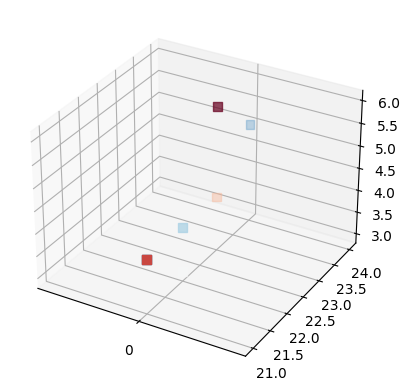

In [ ]:
v = np.random.rand(10,4)
v[:,3] = np.random.randint(0,2,size=10)
df = clusters_description

# print(df.columns)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.array(df['Children'])
y = np.array(df['Age'])
z = np.array(df['Grad_Period'])


i = [i for i in df.index]

ax.scatter(x,y,z, marker="s", c=i, s=40, cmap="RdBu")
plt.show()

# Criar novo aluno e analisar a qual cluster pertence

In [ ]:
#Gender	Marital_Status	University	Ocupation	Children	Classify_Dep	Classify_Anx	Classify_Str	Age	Grad_Period

def cluster_infer(
    gender = '',
    marital_status = '',
    university = '',
    ocupation = '',
    children = '',
    classify_dep = '',
    classify_anx = '',
    classify_str = '',
    age = '',
    grad_period = ''
    ):
  novo_aluno = {
      'Gender': gender,
      'Marital_Status': marital_status,
      'University': university,
      'Ocupation': ocupation,
      'Children': children,
      'Classify_Dep': classify_dep,
      'Classify_Anx': classify_anx,
      'Classify_Str': classify_str,
      'Age': age,
      'Grad_Period': grad_period
  }

  dados_df = pd.DataFrame(columns = columns_to_keep)
  dados_df = dados_df.append(novo_aluno, ignore_index = True)

  attr_normalizer = open('/content/cat_normal_definition.model', 'r')
  e = pd.DataFrame(columns=attr_normalizer.read().split(',') + num_columns)
  
  e_cat = dados_df.drop(columns=num_columns)
  e_num = dados_df[num_columns]

  e_cat = pd.get_dummies(e_cat,prefix_sep='&')
  # print(e_cat)
  e_ = pd.concat([e,e_cat],sort=False, ignore_index=True)
  # =print(e_)

  school_normalizer = load(open('/content/num_normalizer.model', 'rb'))
  e_num = school_normalizer.transform(e_num)
  

  #Recompor o data frame, a partir dos dados normalizados
  e_num = pd.DataFrame(e_num, columns=num_columns)
  e_ = e_cat.join(e_num, how='left')
  e = pd.concat([e,e_],sort=False, ignore_index=True )
  e = e.fillna(0)

  cluster_model = load(open('/content/dados_kmeans_model.pkl', 'rb'))
  cluster_designado = cluster_model.predict(e.values.tolist())

  print(e)
  return cluster_designado

In [ ]:
#Gender	Marital_Status	University	Ocupation	Children	Classify_Dep	Classify_Anx	Classify_Str	Age	Grad_Period
c = cluster_infer('Feminino','Casada(o)','UP','Estudante e Trabalho','1','Extremely Severe','Mild','Moderate','32','8')
print(clusters_description.iloc[c])


   Gender&Feminino  Gender&Masculino  Gender&Outro  Marital_Status&Casada(o)  \
0                1                 0             0                         1   

   Marital_Status&Solteira(o)  University&FEMPAR  University&FPP  \
0                           0                  0               0   

   University&FPS  University&Federal do Paraná   University&PUCPR  \
0               0                              0                 0   

   University&UFPR  University&UFPR   University&UNICESUMAR  \
0                0                 0                      0   

   University&UNISUL  University&UNIVALI  University&UNOESTE  University&UP  \
0                  0                   0                   0              1   

   University&Unicesumar   University&ufpr  Ocupation&Estudante  \
0                       0                0                    0   

   Ocupation&Estudante e Trabalho  Children&0  Children&1  \
0                               1           0           1   

   Classify_Dep&E

<ipython-input-37-fa90bb564c9b>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dados_df = dados_df.append(novo_aluno, ignore_index = True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
